# Bai 3.1

357.5054647396447 [    0.         -2827.37411211  4247.30397482  4725.47826184]


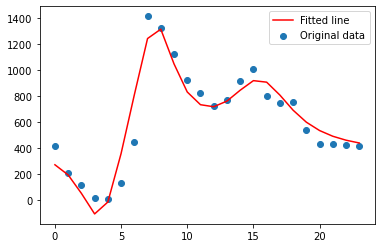

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
xdata = np.arange(0, 24)
ydata = np.array([416, 212, 121, 17, 12, 132, 445, 1412, 1322, 1121, 925, 823, 721, 772, 913, 1005, 802, 743, 754, 543, 431, 429, 423, 419])

b1, b2, b3 = 2, 2, 3
u0 = u0 = np.ones(len(xdata))
u1 = 1 / (b1**2 + (xdata - 3.5)**2) 
u2 = 1 / (b2**2 + (xdata - 7.5)**2) 
u3 = 1 / (b3**2 + (xdata - 15.5)**2) 

model = LinearRegression(fit_intercept=True)
vdata = np.vstack((u0, u1, u2, u3))
vdata = vdata.T
model.fit(vdata, ydata)
print(model.intercept_,model.coef_)
theta0 = model.intercept_
theta1 = model.coef_[0]
theta2 = model.coef_[1]
theta3 = model.coef_[2]

plt.scatter(xdata, ydata, label = "Original data")
plt.plot(xdata, model.predict(vdata), 'r', label = 'Fitted line' )
plt.legend()
plt.show()

# bai 3.2

[ 3.91845016e+02 -3.39446450e+03  2.79718911e+03  4.83252923e+03
  2.30320931e+00  1.55583978e+00  3.06795927e+00]


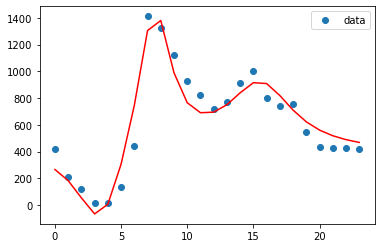

In [92]:
def func1(x, a0, a1, a2, a3, b1, b2, b3):
    u1 = a1 / (b1**2 + (xdata - 3.5)**2) 
    u2 = a2 / (b2**2 + (xdata - 7.5)**2) 
    u3 = a3 / (b3**2 + (xdata - 15.5)**2) 
    return a0 + u1 + u2 + u3

from scipy.optimize import curve_fit
xdata = np.arange(0, 24)
ydata = np.array([416, 212, 121, 17, 12, 132, 445, 1412, 1322, 1121, 925, 823, 721, 772, 913, 1005, 802, 743, 754, 543, 431, 429, 423, 419])
g = [600, 36000, 97000, 51571, 2, 2, 3]
popt, pcov = curve_fit(func1, xdata, ydata,g)
print(popt)
plt.plot(xdata, ydata, 'o', label='data')
#plt.plot(xdata, func1(xdata, *g), 'm-', label = 'guess line')
plt.plot(xdata, func1(xdata, *popt), 'r-')#, label='curve fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.legend()
plt.show()

# Bai 4

[1.55039234 0.65056512 0.24095084]


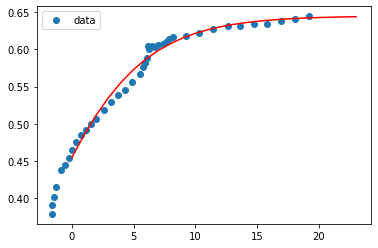

In [90]:
from scipy.optimize import curve_fit
import pandas as pd
import math


def func2(x, a, b, c):
    return 1 / (a + b*math.e**(-c*x))


data = pd.read_csv("sample.csv")
x = data["x"].values
y = data["y"].values
# x = np.array(x)
# y = np.array(y)
g = [1.55, 0.65, 0.24]
popt, pcov = curve_fit(func2, x, y, g)
print(popt)
plt.plot(x, y, 'o', label='data')
#plt.plot(xdata, func1(xdata, *g), 'm-', label = 'guess line')
plt.plot(xdata, func2(xdata, *popt), 'r-')#, label='curve fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.legend()
plt.show()